Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In the cell below, flight data is retrieved from the OpenSky Network API using the `requests` library. The JSON response is parsed, and each flight's state vector is converted into a dictionary with named fields (such as `icao24`, `callsign`, `origin_country`, etc.). These dictionaries are collected into a list called `flights`. Finally, a pandas DataFrame named `df` is created from the raw API data and its first few rows are printed for inspection.

In [2]:
url = "https://opensky-network.org/api/states/all"
response = requests.get(url)

data = response.json()

# Convert to list of dictionaries for convenience
flights = []
for state in data.get("states", []):
    state = state + [None]*(18 - len(state))

    flights.append({
        "icao24": state[0],
        "callsign": state[1],
        "origin_country": state[2],
        "time_position": state[3],
        "last_contact": state[4],
        "longitude": state[5],
        "latitude": state[6],
        "baro_altitude": state[7],
        "on_ground": state[8],
        "velocity": state[9],
        "true_track": state[10],
        "vertical_rate": state[11],
        "sensors": state[12],
        "geo_altitude": state[13],
        "squawk": state[14],
        "spi": state[15],
        "position_source": state[16],
        "category": state[17]
    })

# Create DataFrame
df = pd.DataFrame(data)

print(df.head())

         time                                             states
0  1756515440  [80162c, AXB254  , India, 1756515338, 17565153...
1  1756515440  [e8027c, LPE2391 , Chile, 1756515440, 17565154...
2  1756515440  [e8027e, LPE2461 , Chile, 1756515427, 17565154...
3  1756515440  [aa9321, UAL672  , United States, 1756515427, ...
4  1756515440  [801641, AXB2510 , India, 1756515439, 17565154...


### Initiating EDA(Exploratory Data Analysis)

In [3]:
df.head()

,time,states
0,1756515440,"[80162c, AXB254 , India, 1756515338, 17565153..."
1,1756515440,"[e8027c, LPE2391 , Chile, 1756515440, 17565154..."
2,1756515440,"[e8027e, LPE2461 , Chile, 1756515427, 17565154..."
3,1756515440,"[aa9321, UAL672 , United States, 1756515427, ..."
4,1756515440,"[801641, AXB2510 , India, 1756515439, 17565154..."


In [4]:

def pad_state(state):
    if state is None:
        return [None]*18
    return state + [None]*(18 - len(state))


states_padded = df['states'].apply(pad_state)

# Cria DataFrame expandido
df_expanded = pd.DataFrame(states_padded.tolist(), columns=[
    "icao24",
    "callsign",
    "origin_country",
    "time_position",
    "last_contact",
    "longitude",
    "latitude",
    "baro_altitude",
    "on_ground",
    "velocity",
    "true_track",
    "vertical_rate",
    "sensors",
    "geo_altitude",
    "squawk",
    "spi",
    "position_source",
    "category"
])

# Mantém a coluna 'time'
df_final = pd.concat([df['time'], df_expanded], axis=1)

df_final.head()

,time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category
0,1756515440,80162c,AXB254,India,1.756515e+09,1756515338,72.8728,19.0888,68.58,False,80.77,269.27,-1.95,None,-38.10,None,False,0,None
1,1756515440,e8027c,LPE2391,Chile,1.756515e+09,1756515440,-76.5233,-7.3665,10965.18,False,238.56,193.98,0.00,None,11673.84,None,False,0,None
2,1756515440,e8027e,LPE2461,Chile,1.756515e+09,1756515427,-71.0405,11.6973,10363.20,False,230.71,201.59,0.33,None,11003.28,None,False,0,None
3,1756515440,aa9321,UAL672,United States,1.756515e+09,1756515440,-122.3687,37.6143,NaN,True,7.72,126.56,NaN,None,NaN,None,False,0,None
4,1756515440,801641,AXB2510,India,1.756515e+09,1756515439,76.8407,8.7207,2735.58,False,145.58,351.67,13.98,None,2758.44,2750,False,0,None


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7549 entries, 0 to 7548
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7549 non-null   int64  
 1   icao24           7549 non-null   object 
 2   callsign         7549 non-null   object 
 3   origin_country   7549 non-null   object 
 4   time_position    7493 non-null   float64
 5   last_contact     7549 non-null   int64  
 6   longitude        7493 non-null   float64
 7   latitude         7493 non-null   float64
 8   baro_altitude    6782 non-null   float64
 9   on_ground        7549 non-null   bool   
 10  velocity         7549 non-null   float64
 11  true_track       7549 non-null   float64
 12  vertical_rate    6797 non-null   float64
 13  sensors          0 non-null      object 
 14  geo_altitude     6722 non-null   float64
 15  squawk           3487 non-null   object 
 16  spi              7549 non-null   bool   
 17  position_sourc

In [6]:
#df_final.drop(['category', 'sensors'], axis=1, inplace=True) # considering droping squawk too
df_final['time'] = pd.to_datetime(df_final['time'], unit='s')
df_final['time_position'] = pd.to_datetime(df_final['time_position'], unit='s')
df_final['last_contact'] = pd.to_datetime(df_final['last_contact'], unit='s')
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7549 entries, 0 to 7548
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             7549 non-null   datetime64[ns]
 1   icao24           7549 non-null   object        
 2   callsign         7549 non-null   object        
 3   origin_country   7549 non-null   object        
 4   time_position    7493 non-null   datetime64[ns]
 5   last_contact     7549 non-null   datetime64[ns]
 6   longitude        7493 non-null   float64       
 7   latitude         7493 non-null   float64       
 8   baro_altitude    6782 non-null   float64       
 9   on_ground        7549 non-null   bool          
 10  velocity         7549 non-null   float64       
 11  true_track       7549 non-null   float64       
 12  vertical_rate    6797 non-null   float64       
 13  sensors          0 non-null      object        
 14  geo_altitude     6722 non-null   float64

In [7]:
df_final.head()

,time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category
0,2025-08-30 00:57:20,80162c,AXB254,India,2025-08-30 00:55:38,2025-08-30 00:55:38,72.8728,19.0888,68.58,False,80.77,269.27,-1.95,None,-38.10,None,False,0,None
1,2025-08-30 00:57:20,e8027c,LPE2391,Chile,2025-08-30 00:57:20,2025-08-30 00:57:20,-76.5233,-7.3665,10965.18,False,238.56,193.98,0.00,None,11673.84,None,False,0,None
2,2025-08-30 00:57:20,e8027e,LPE2461,Chile,2025-08-30 00:57:07,2025-08-30 00:57:07,-71.0405,11.6973,10363.20,False,230.71,201.59,0.33,None,11003.28,None,False,0,None
3,2025-08-30 00:57:20,aa9321,UAL672,United States,2025-08-30 00:57:07,2025-08-30 00:57:20,-122.3687,37.6143,NaN,True,7.72,126.56,NaN,None,NaN,None,False,0,None
4,2025-08-30 00:57:20,801641,AXB2510,India,2025-08-30 00:57:19,2025-08-30 00:57:19,76.8407,8.7207,2735.58,False,145.58,351.67,13.98,None,2758.44,2750,False,0,None


### Starting EDA

Calculating Null values percentage by collumn

In [8]:
null_values_perc = pd.DataFrame(df_final.isnull().mean()*100, columns=['% of null values']).sort_values(by='% of null values', ascending=False)
null_values_perc = null_values_perc.reset_index().rename(columns={'index': 'Column'})
null_values_perc = null_values_perc[null_values_perc['% of null values'] > 0]
null_values_perc

,Column,% of null values
0,category,100.000000
1,sensors,100.000000
2,squawk,53.808451
3,geo_altitude,10.955093
4,baro_altitude,10.160286
5,vertical_rate,9.961584
6,latitude,0.741820
7,longitude,0.741820
8,time_position,0.741820


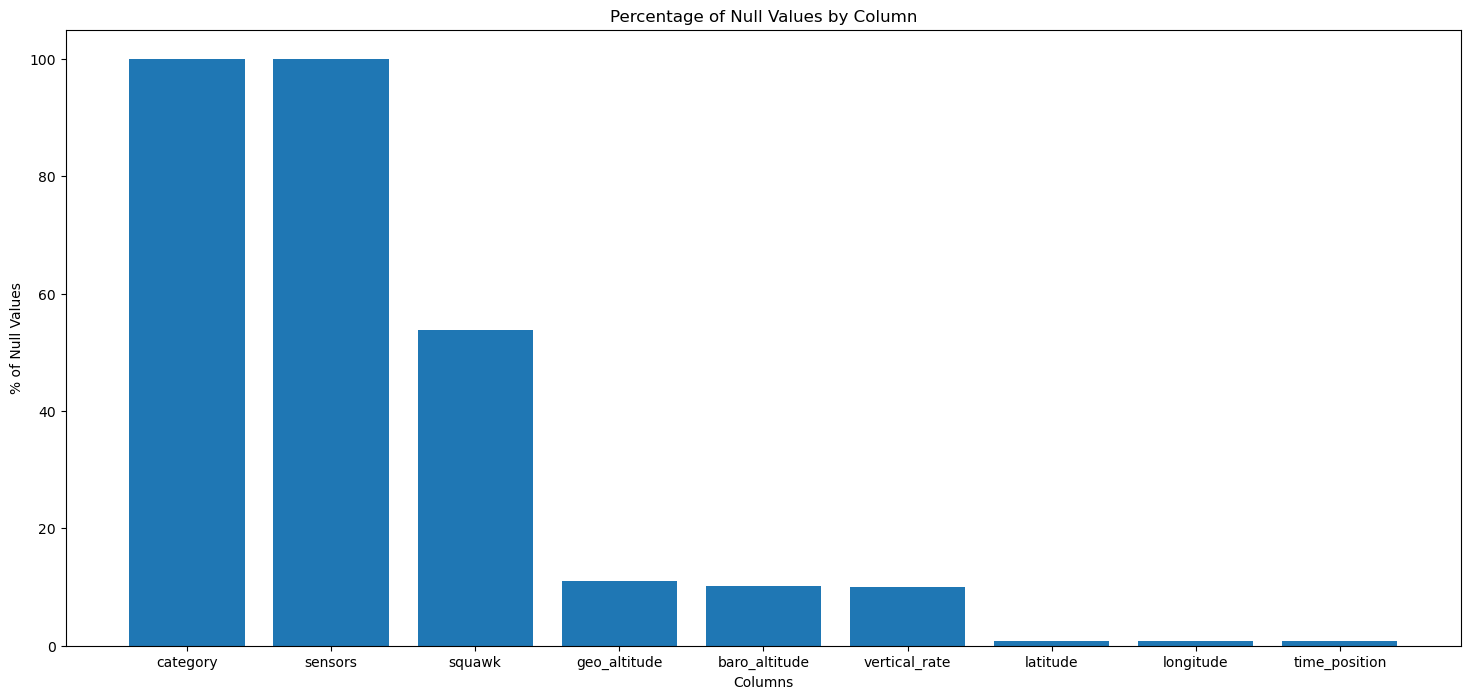

In [9]:
plt.figure(figsize=(18, 8))
plt.bar(null_values_perc['Column'], null_values_perc['% of null values'])
plt.xlabel('Columns')
plt.ylabel('% of Null Values')
plt.title('Percentage of Null Values by Column')
plt.show()

#df_final.columns[df_final.isna().any()].tolist()[::-1],

### Looking for abnormalities or outliers

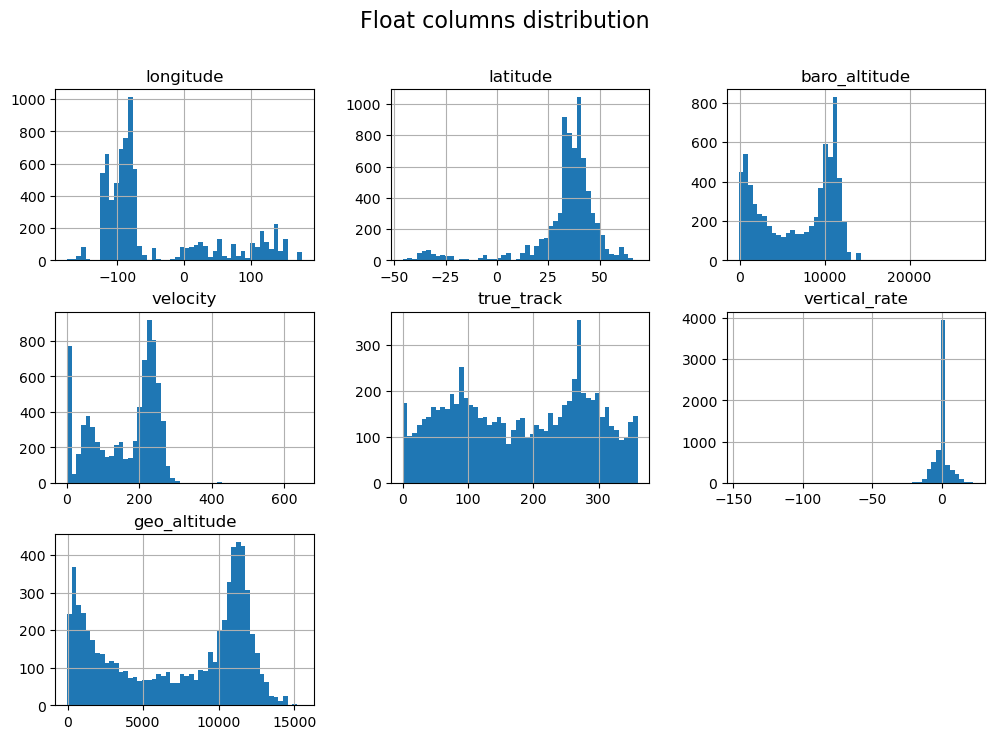

In [10]:
df_float = df_final.select_dtypes(include=['float64', 'float32'])
df_float.hist(figsize=(12,8), bins=50)
plt.suptitle("Float columns distribution", fontsize=16)
plt.show()


In [11]:
min_max = df_float.agg(['min', 'max']).T
min_max


,min,max
longitude,-175.6725,176.8051
latitude,-45.8636,68.4845
baro_altitude,-152.4000,27523.4400
velocity,0.0000,648.5100
true_track,0.0000,359.8800
vertical_rate,-146.3000,22.7600
geo_altitude,-45.7200,15506.7000


#### Timestamp Consistency

In [14]:
# Diferença em segundos
df_final['diff_seconds'] = (df_final['last_contact'] - df_final['time_position']).dt.total_seconds()
df_final.head()


,time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category,diff_seconds
0,2025-08-30 00:57:20,80162c,AXB254,India,2025-08-30 00:55:38,2025-08-30 00:55:38,72.8728,19.0888,68.58,False,80.77,269.27,-1.95,None,-38.10,None,False,0,None,0.0
1,2025-08-30 00:57:20,e8027c,LPE2391,Chile,2025-08-30 00:57:20,2025-08-30 00:57:20,-76.5233,-7.3665,10965.18,False,238.56,193.98,0.00,None,11673.84,None,False,0,None,0.0
2,2025-08-30 00:57:20,e8027e,LPE2461,Chile,2025-08-30 00:57:07,2025-08-30 00:57:07,-71.0405,11.6973,10363.20,False,230.71,201.59,0.33,None,11003.28,None,False,0,None,0.0
3,2025-08-30 00:57:20,aa9321,UAL672,United States,2025-08-30 00:57:07,2025-08-30 00:57:20,-122.3687,37.6143,NaN,True,7.72,126.56,NaN,None,NaN,None,False,0,None,13.0
4,2025-08-30 00:57:20,801641,AXB2510,India,2025-08-30 00:57:19,2025-08-30 00:57:19,76.8407,8.7207,2735.58,False,145.58,351.67,13.98,None,2758.44,2750,False,0,None,0.0


In [15]:
df_final['diff_seconds'].describe()

count    7493.000000
mean       14.468971
std       213.372374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      9400.000000
Name: diff_seconds, dtype: float64

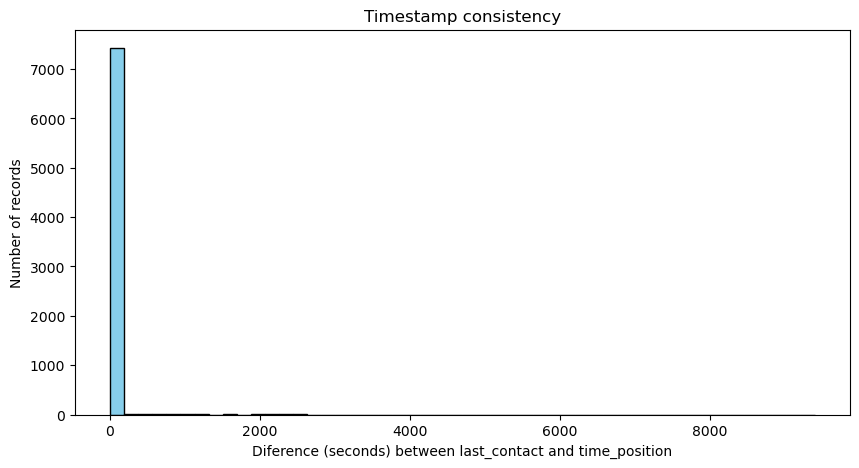

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_final['diff_seconds'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Diference (seconds) between last_contact and time_position')
plt.ylabel('Number of records')
plt.title('Timestamp consistency')
plt.show()


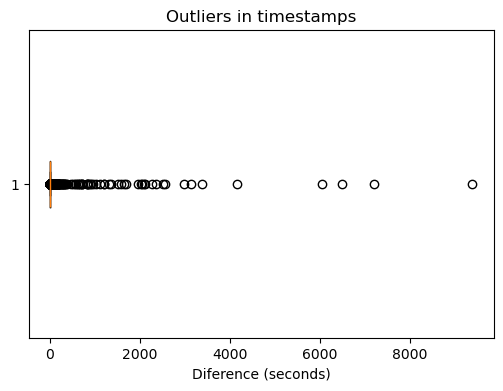

In [19]:
plt.figure(figsize=(6,4))
plt.boxplot(df_final['diff_seconds'].dropna(), vert=False)
plt.xlabel('Diference (seconds)')
plt.title('Outliers in timestamps')
plt.show()


### Spatial and temporal distribution

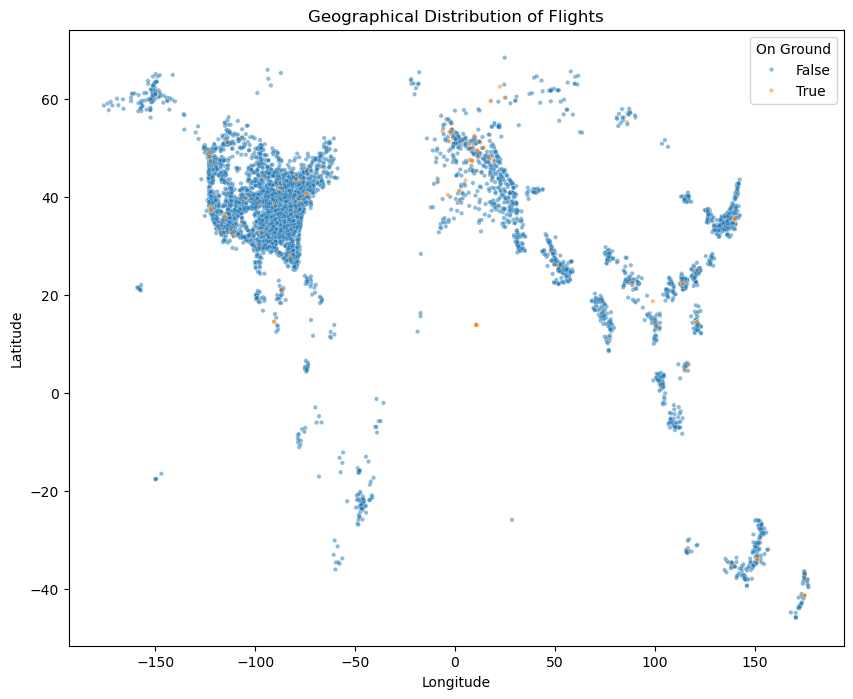

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df_final,
    x='longitude',
    y='latitude',
    hue='on_ground',  # differentiate ground vs air
    alpha=0.5,        # transparency for dense regions
    s=10              # marker size
)
plt.title('Geographical Distribution of Flights')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='On Ground')
plt.show()

#plt.figure(figsize=(10,8))
#plt.hexbin(df_final['longitude'], df_final['latitude'], gridsize=100, cmap='Blues', mincnt=1)
#plt.colorbar(label='Number of points')
#plt.title('Flight Density (Hexbin)')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()


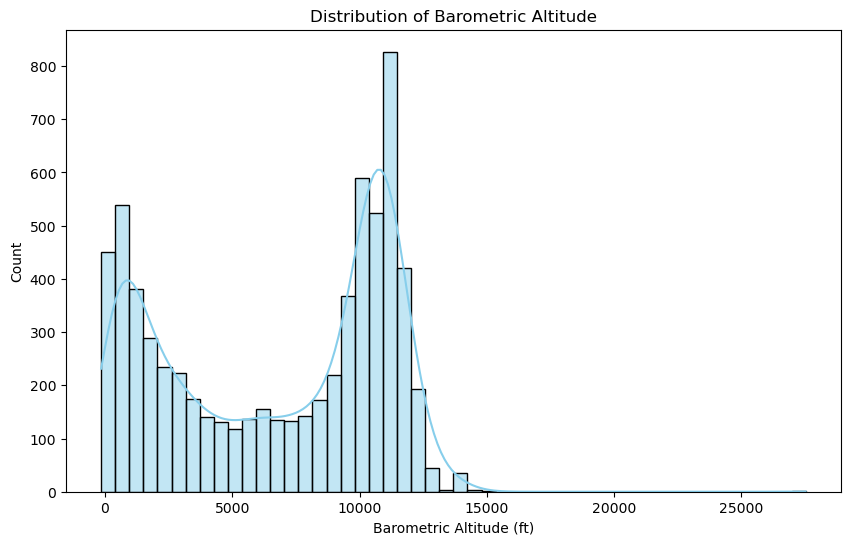

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df_final['baro_altitude'].dropna(), bins=50, color='skyblue', kde=True)
plt.title('Distribution of Barometric Altitude')
plt.xlabel('Barometric Altitude (ft)')
plt.ylabel('Count')
plt.show()


#### Altitude vs. Velocity

In [ ]:
import plotly.express as px

# --- 1. Altitude vs. Velocity ---
fig1 = px.scatter(
    df_final,
    x="baro_altitude",
    y="velocity",
    color="origin_country",
    hover_data=["callsign", "icao24"],
    title="Altitude vs. Velocity by Origin Country"
)
fig1.show()

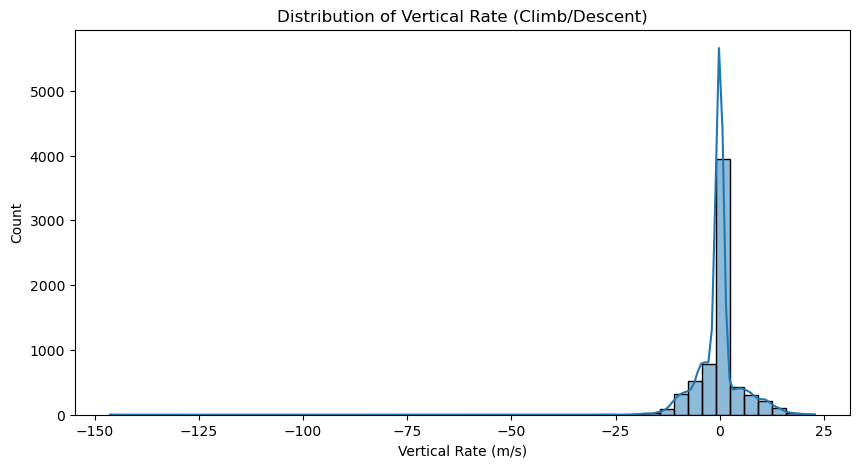

In [31]:
# --- 2. Vertical Rate Histograms ---
plt.figure(figsize=(10,5))
sns.histplot(df_final["vertical_rate"], bins=50, kde=True)
plt.title("Distribution of Vertical Rate (Climb/Descent)")
plt.xlabel("Vertical Rate (m/s)")
plt.ylabel("Count")
plt.show()

In [32]:
# --- 3. Origin Country Distribution ---
origin_counts = df_final["origin_country"].value_counts().reset_index()
origin_counts.columns = ["country", "count"]

fig3 = px.bar(
    origin_counts,
    x="country",
    y="count",
    labels={"country": "Country", "count": "Number of Active Flights"},
    title="Active Flights by Origin Country"
)
fig3.show()
